### Aprendizado supervisionado

### Predizer preços de carros usados

**1.1 Importar bibliotecas básicas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.2 Importar o conjunto de dados**

In [2]:
df = pd.read_csv('Coches_Segunda_Mano.csv')

In [3]:
df.head()

,Marca,Modelo,Año,Combustible,CV,Cilindros,Transmisión,Tracción,Puertas,Mercado,Tamaño,Estilo,Consumo Carretera,Consumo Ciudad,Popularidad,Precio
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26.0,19.0,3916,46135.0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28.0,19.0,3916,40650.0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28.0,20.0,3916,36350.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28.0,18.0,3916,29450.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28.0,18.0,3916,34500.0


**1.3 Acessar número de linhas e colunas**

In [4]:
df.shape

(11914, 16)

**1.3 Verificar tipos de dados em cada coluna**

In [5]:
df.dtypes

Marca                 object
Modelo                object
Año                    int64
Combustible           object
CV                   float64
Cilindros            float64
Transmisión           object
Tracción              object
Puertas              float64
Mercado               object
Tamaño                object
Estilo                object
Consumo Carretera    float64
Consumo Ciudad       float64
Popularidad            int64
Precio               float64
dtype: object

**2. Número de portas é uma variável numérica?**

**Engenharia de variáveis**

**2.1 Quais os valores existentes para a variável Portas?**

In [6]:
df['Puertas'].unique()

array([ 2.,  4.,  3., nan])

**2.2 Remapear a variável Portas**

In [7]:
# Convertemos os números a strings
df['Puertas'] = df.Puertas.astype(str)

# Criamos um dicionários explicitando como queremos que a variável porta seja modificada
mapeamento = {
    
    '2.0': 'Dos puertas',
    '3.0': 'Tres puertas',
    '4.0': 'Cuatro puertas',
    
}

# Criando uma função para substituir valores de acordo com o dicionário acima

def mapear_puertas(x):
    if pd.notnull(x):
        return mapeamento.get(x)
    else:
        return np.nan

# Aplicar a função a cada linha do dataframe
df['Puertas'] = df['Puertas'].map(mapear_puertas)

**2.3 Quais os valores existentes para a variável Cilindros e em que quantidades?**

In [8]:
df['Cilindros'].value_counts()

# Existe carro com 0 cilindros?

Cilindros
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: count, dtype: int64

In [9]:
df['Tamaño'].value_counts()

Tamaño
Compact    4764
Midsize    4373
Large      2777
Name: count, dtype: int64

**2.5 Vou converter a variável Tamanho a uma escala ordinal, que fará mais sentido**

In [10]:
# Cria um dicionário dizendo como eu quero que fiquem os valores
mapeamento = {
    'Compact': 1,
    'Midsize': 2,
    'Large': 3
}

def mapear_tamanho(x):
    if pd.notnull(x):
        return mapeamento.get(x)
    else:
        return np.nan

# Aplicar a função a cada linha do dataframe
df['Tamaño'] = df['Tamaño'].map(mapear_tamanho)

In [11]:
df.dtypes

Marca                 object
Modelo                object
Año                    int64
Combustible           object
CV                   float64
Cilindros            float64
Transmisión           object
Tracción              object
Puertas               object
Mercado               object
Tamaño                 int64
Estilo                object
Consumo Carretera    float64
Consumo Ciudad       float64
Popularidad            int64
Precio               float64
dtype: object

**3. Análise exploratória de dados categóricos**

**3.1 Criamos um dataframe contendo apenas as variáveis categóricas**

In [12]:
df_categorical = df.select_dtypes(include = 'object').copy()

In [13]:
df_categorical.head()

,Marca,Modelo,Combustible,Transmisión,Tracción,Puertas,Mercado,Estilo
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,Dos puertas,"Factory Tuner,Luxury,High-Performance",Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Dos puertas,"Luxury,Performance",Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Dos puertas,"Luxury,High-Performance",Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Dos puertas,"Luxury,Performance",Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Dos puertas,Luxury,Convertible


**3.2 Para cada variável, nós vamos ver quantos níveis há:**

**3.3 Talvez, se tivessêmos muito conhecimento sobre carros, poderíamos juntar dados de marcas semelhantes**

In [14]:
df_categorical['Marca'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [15]:
df_categorical['Marca'].value_counts()

Marca
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyk

**3.4 O mesmo para a variável Modelo, que mostra-se como um grande desafio**

In [16]:
df_categorical['Modelo'].unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '5 Series Gran Turismo',
       '5 Series', '500-Class', '500e', '500', '500L', '500X', '550',
       '560-Class', '570S', '575M', '57', '599', '5',
       '6 Series Gran Coupe', '6 Series', '600-Class', '6000',
       '612 Scaglietti', '626', '62', '650S Coupe', '650S Spider', '6',
       '7 Series', '718 Cayman', '740', '760', '780', '8 Series', '80',
       '850', '86', '9-2X', '9-3 Griffin', '9-3', '9-4X', '9-5', '9-7X',
       '9000', '900', '90', '911', '928', '929', '940', '944', '960',
       '968', 'A3', 'A4 allroad', 'A4', 'A5', 'A6', 'A7', 'A8',
       'Acadia Limited', 'Acadia', 'Accent', 'Acclaim'

In [17]:
df_categorical['Modelo'].value_counts()

Modelo
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
                     ... 
Precis                  1
MKZ Hybrid              1
Diablo                  1
V90                     1
Enzo                    1
Name: count, Length: 915, dtype: int64

**3.5 Podemos diminuir o número de níveis da variável Combustível:**

In [18]:
df_categorical['Combustible'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

**Veja que o valor 'natural gas' só aparece duas vezes**

In [19]:
df_categorical['Combustible'].value_counts()

Combustible
regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

**3.6 A variável Transmissão possui algumas linhas com valores ausentes (Unkown)**

**Nem sempre valores ausentes aparecem como NA.** 

**Podem aparecer com outras palavras ou com 
valores extremos e negativos sem sentido para a variável, como -999.**

In [20]:
df_categorical['Transmisión'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [21]:
df_categorical['Transmisión'].value_counts()

Transmisión
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

**3.7 A variável Tração mostra-se com poucos níveis e bem categorizada**

In [22]:
df_categorical['Tracción'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [23]:
df_categorical['Tracción'].value_counts()

Tracción
front wheel drive    4787
rear wheel drive     3371
all wheel drive      2353
four wheel drive     1403
Name: count, dtype: int64

**3.8 A variável Estilo pode ser reajustada**

In [24]:
df_categorical['Estilo'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [25]:
df_categorical['Estilo'].value_counts()

Estilo
Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: count, dtype: int64

**3.9 A variável Mercado também mostra-se muito desafiadora**

In [26]:
df_categorical['Mercado'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [27]:
df_categorical['Mercado'].value_counts()

Mercado
Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,High-Performance              1
Crossover,Exotic,Luxury,Performance                   1
Performance,Hybrid                                    1
Exotic,Luxury,High-Performance,Hybrid                 1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Name: count, Length: 71, dtype: int64

Algumas variáveis categóricas possuem quantidade muito grande de níveis, o que
dificulta o uso em modelos de machine learning.

Vou optar por eliminá-las do nosso modelo.

**3.11 Eliminar variáveis categóricas com número excessivo de níveis**

In [28]:
# Remover as variáveis Modelo, Marca e Mercado
df = df.drop(['Modelo', 'Marca', 'Mercado'], axis=1)

**3.12 Remapear a variável Combustível**

In [29]:
# Converto cada nome a strings
df['Combustible'] = df.Combustible.astype(str)

# Crio um dicionário explicando como quero que seja minha transformação
mapeamento = {
    
    'regular unleaded': 'regular unleaded',
    'premium unleaded (required)': 'premium',
    'premium unleaded (recommended)': 'premium',
    'flex-fuel (unleaded/E85)': 'flex', 
    'diesel': 'diesel',
    'eletric': 'eletric',
    'flex-fuel (premium unleaded required/E85)': 'flex',
    'flex-fuel (premium unleaded recommended/E85)': 'flex',
    'flex-fuel (unleaded/natural gas)': 'flex',
    'natural gas': 'natural gas'
}

def mapear_combustivel(x):
    if pd.notnull(x):
        return mapeamento.get(x)
    else:
        return np.nan

# Aplicar a função a cada linha do dataframe
df['Combustible'] = df['Combustible'].map(mapear_combustivel)

**3.13 Remapear a variável Estilo**

In [30]:
# Estilo

df['Estilo'] = df.Estilo.astype(str)

mapeamento = {
    
    'Sedan': 'Sedan',
    '4dr SUV': 'SUV',
    'Coupe': 'Coupe',
    'Convertible': 'Convertible', 
    '4dr Hatchback': 'Hatchback',
    'Crew Cab Pickup': 'Pickup',
    'Extended Cab Pickup': 'Pickup',
    'Wagon': 'Wagon',
    '2dr Hatchback': 'Hatchback',
    'Passenger Minivan': 'Van',
    'Regular Cab Pickup': 'Pickup',
    '2dr SUV': 'SUV',
    'Passenger Van': 'Van',
    'Cargo Van': 'Van',
    'Cargo Minivan': 'Van',
    'Convertible SUV': 'SUV'
}

def mapear_estilo(x):
    if pd.notnull(x):
        return mapeamento.get(x)
    else:
        return np.nan

# Aplicar a função a cada linha do dataframe
df['Estilo'] = df['Estilo'].map(mapear_estilo)

**3.14 Modificar o dataframe para que na coluna Combustible sejam eliminadas as linhas 'natural gas'**

In [31]:
df = df.loc[df['Combustible'] != 'natural gas']

**3.15 Modificar o dataframe para que na coluna Transmissión sejam eliminadas as linhas 'Unknown'**

In [32]:
df = df.loc[df['Transmisión'] != 'UNKNOWN']

**3.16 Gráficos com as variávels categóricas**

**3.17 Criamos novamente um dataframe df_categorical porque fizemos muitas mudanças**

**Não usaremos mais o anterior**

In [33]:
df_categorical = df.select_dtypes(include = 'object').copy()

In [34]:
df_categorical.head()

,Combustible,Transmisión,Tracción,Puertas,Estilo
0,premium,MANUAL,rear wheel drive,Dos puertas,Coupe
1,premium,MANUAL,rear wheel drive,Dos puertas,Convertible
2,premium,MANUAL,rear wheel drive,Dos puertas,Coupe
3,premium,MANUAL,rear wheel drive,Dos puertas,Coupe
4,premium,MANUAL,rear wheel drive,Dos puertas,Convertible


**3.17 Adicionar a variável Preço em df_categorical**

Usaremos gráficos e matrizes de correlação para formular hipóteses


Queremos ver se há relações entre as variáveis preditoras


Queremos pensar quais variáveis melhor afetam a variável resposta


Não execute nenhum teste que gere modelos (equações), como uma regressão, por exemplo.

In [35]:
df_categorical['Precio'] = df['Precio'].values

In [36]:
df_categorical.head()

,Combustible,Transmisión,Tracción,Puertas,Estilo,Precio
0,premium,MANUAL,rear wheel drive,Dos puertas,Coupe,46135.0
1,premium,MANUAL,rear wheel drive,Dos puertas,Convertible,40650.0
2,premium,MANUAL,rear wheel drive,Dos puertas,Coupe,36350.0
3,premium,MANUAL,rear wheel drive,Dos puertas,Coupe,29450.0
4,premium,MANUAL,rear wheel drive,Dos puertas,Convertible,34500.0


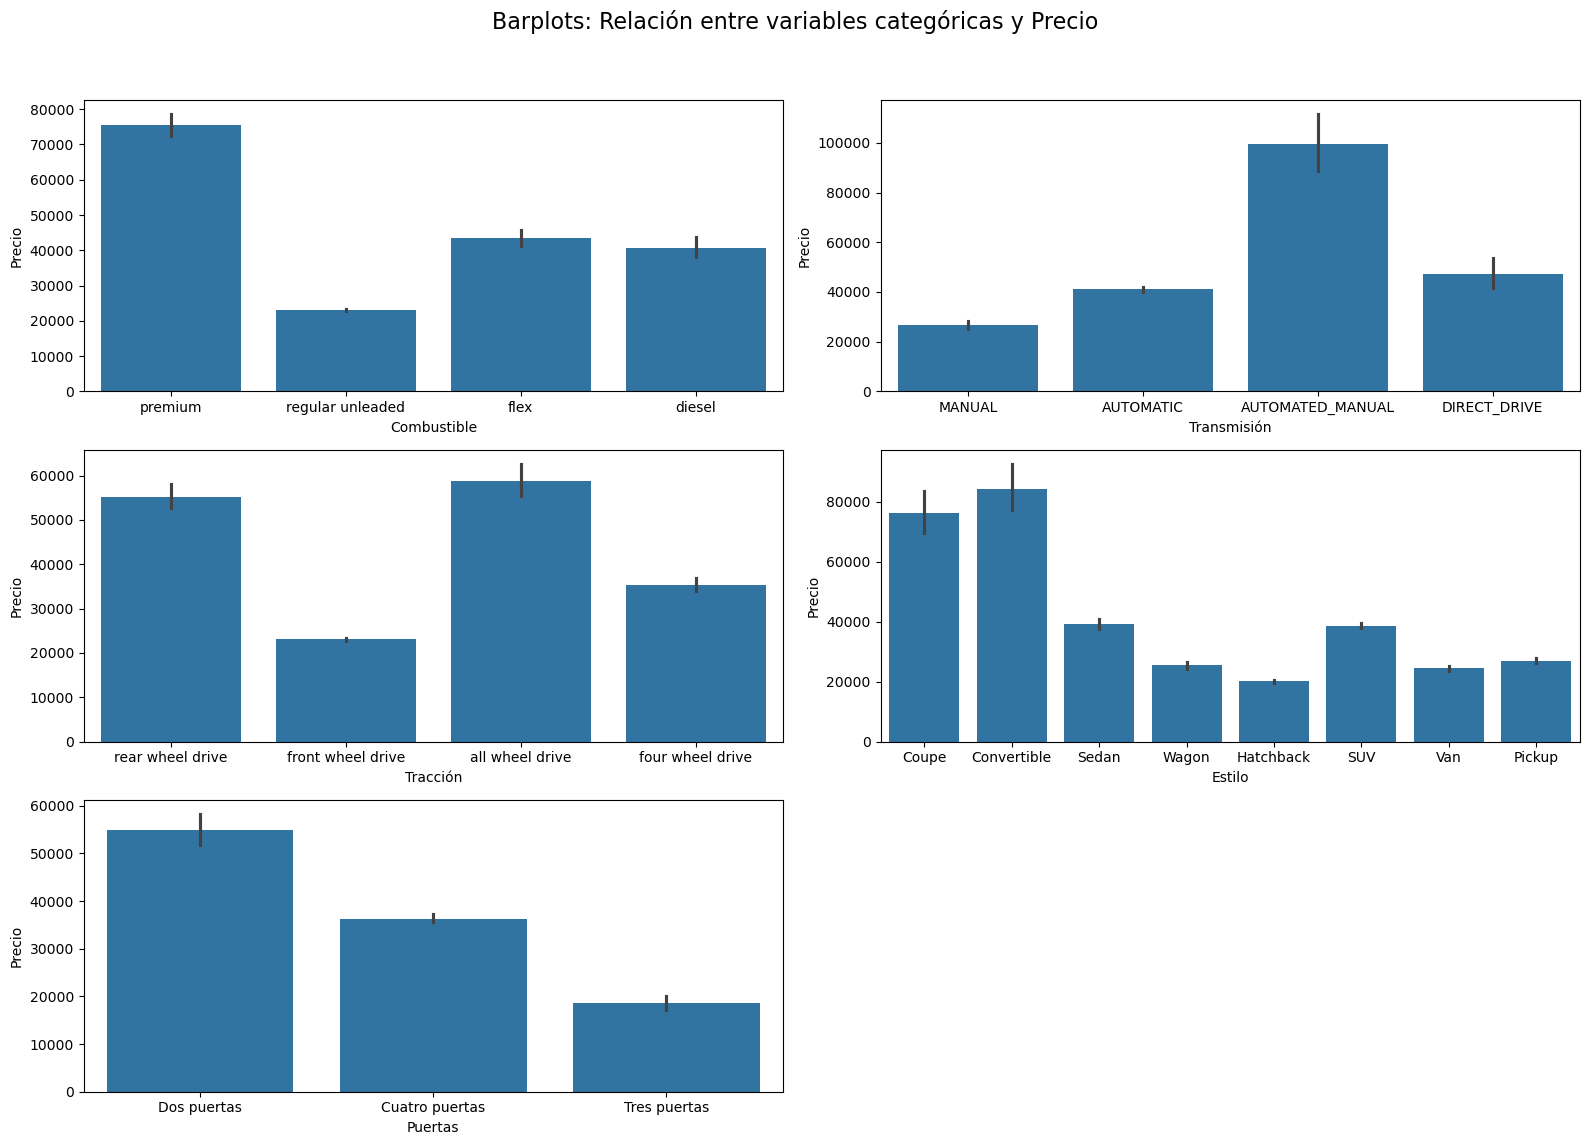

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

fig.suptitle('Barplots: Relación entre variables categóricas y Precio', fontsize=16)

sns.barplot(ax=axes[0], data=df_categorical, x='Combustible', y='Precio', errorbar='ci')
sns.barplot(ax=axes[1], data=df_categorical, x='Transmisión', y='Precio', errorbar='ci')
sns.barplot(ax=axes[2], data=df_categorical, x='Tracción', y='Precio', errorbar='ci')
sns.barplot(ax=axes[3], data=df_categorical, x='Estilo', y='Precio', errorbar='ci')
sns.barplot(ax=axes[4], data=df_categorical, x='Puertas', y='Precio', errorbar='ci')

# Desativa o último eixo (posição 5), que está sobrando
axes[5].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**4. Análise exploratória de dados quantitativos**

In [38]:
df_quantitativos = df.select_dtypes(include = ['float64', 'int64']).copy()

In [39]:
df_quantitativos.head()

,Año,CV,Cilindros,Tamaño,Consumo Carretera,Consumo Ciudad,Popularidad,Precio
0,2011,335.0,6.0,1,26.0,19.0,3916,46135.0
1,2011,300.0,6.0,1,28.0,19.0,3916,40650.0
2,2011,300.0,6.0,1,28.0,20.0,3916,36350.0
3,2011,230.0,6.0,1,28.0,18.0,3916,29450.0
4,2011,230.0,6.0,1,28.0,18.0,3916,34500.0


**4.1 Criar a variável idade e substituir a variável ano do carro**

In [40]:
df_quantitativos['Idade'] = 2025 - df_quantitativos['Año']
df_quantitativos.drop(columns='Año', inplace=True)

In [41]:
df_quantitativos.describe()

,CV,Cilindros,Tamaño,Consumo Carretera,Consumo Ciudad,Popularidad,Precio,Idade
count,11824.000000,11863.000000,11893.000000,11893.000000,11893.000000,11893.000000,1.189300e+04,11893.000000
mean,249.541864,5.628677,1.832927,26.645422,19.740436,1555.629025,4.065684e+04,14.591945
std,109.191749,1.781320,0.777729,8.864680,8.992091,1442.653441,6.014310e+04,7.559689
min,55.000000,0.000000,1.000000,12.000000,7.000000,2.000000,2.000000e+03,8.000000
25%,170.000000,4.000000,1.000000,22.000000,16.000000,549.000000,2.106500e+04,9.000000
50%,227.000000,6.000000,2.000000,26.000000,18.000000,1385.000000,2.999500e+04,10.000000
75%,300.000000,6.000000,2.000000,30.000000,22.000000,2009.000000,4.229500e+04,18.000000
max,1001.000000,16.000000,3.000000,354.000000,137.000000,5657.000000,2.065902e+06,35.000000


**4.2 Como se caracteriza a distribuição da variável resposta?**

<Axes: xlabel='Precio', ylabel='Count'>

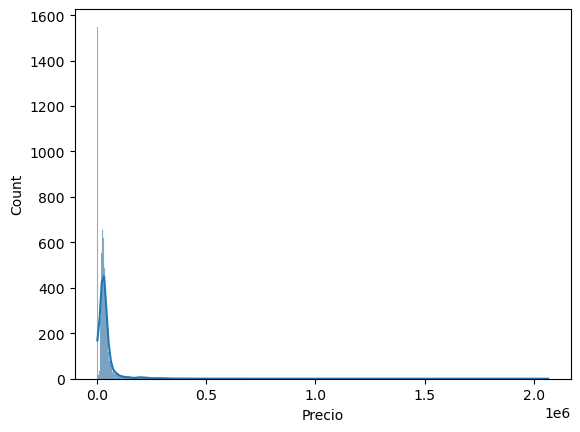

In [42]:
sns.histplot(data=df_quantitativos, x="Precio", kde=True)

A distribuição dos dados se assemelha à distribuição log-normal.

Veja páginas 70 e 71 do Gotelli.

**4.3 Então, como a fica a distribuição do preços transformados em escala log?**

In [43]:
# Trocar o nome da variável para informar que está em escala de logaritmo natural
df_quantitativos.rename(columns={'Precio': 'Precio_ln'}, inplace=True)

# Transformo Precio para escala de logartimo natural
df_quantitativos['Precio_ln'] = np.log(df_quantitativos['Precio_ln'])

**4.4 Refaço o gráfico**

<Axes: xlabel='Precio_ln', ylabel='Count'>

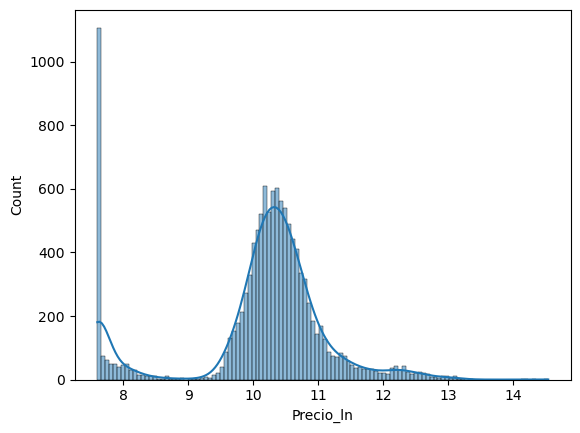

In [44]:
sns.histplot(data=df_quantitativos, x="Precio_ln", kde=True)

A distribuição dos dados melhora.

Mas não é exatamente uma distribuição normal.

Preços muito baixos podem ser comuns para carros usados.

Possivelmente, temos carros de luxo usados que estão funcionando como valores extremos.

**4.5 Matriz de correlação**

Apenas observe e formule hipóteses.

Não exclua variáveis com base nessa matriz de correlação.

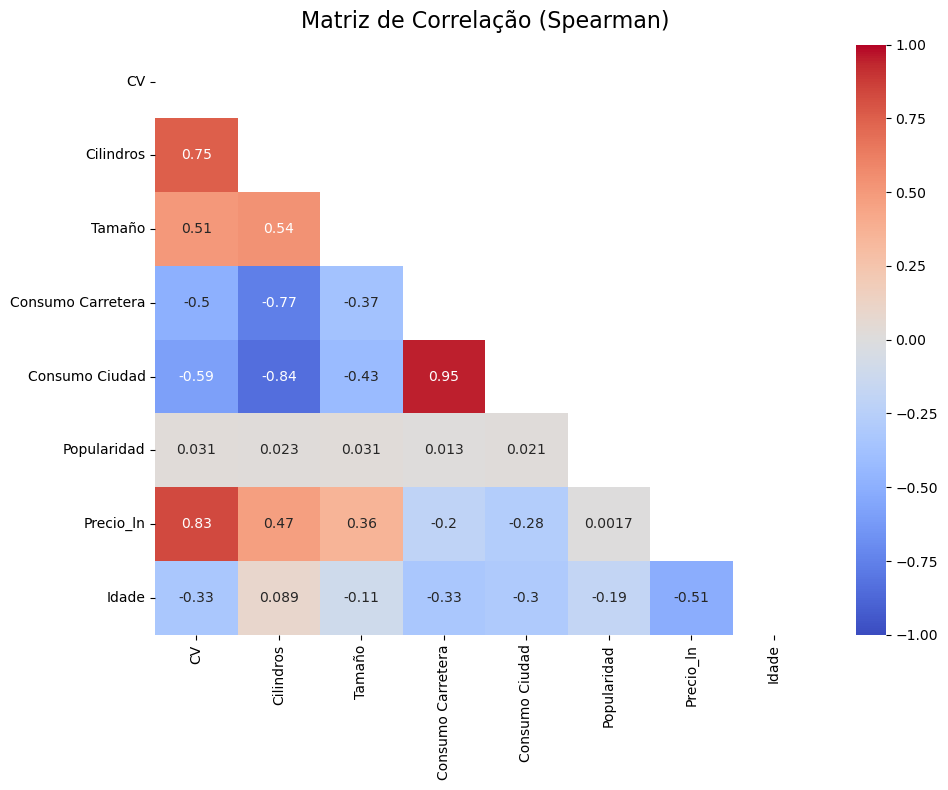

In [47]:
# Calcula a correlação
corr = df_quantitativos.corr(method='spearman')

# Cria uma máscara para ocultar a metade superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plota a matriz de correlação apenas com a metade inferior
plt.figure(figsize=(10, 8))  # Ajuste o tamanho como quiser
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Matriz de Correlação (Spearman)', fontdict={'fontsize': 16}, pad=12)

plt.tight_layout()
plt.savefig('matriz_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()




**5. Há valores faltantes no dataframe?**

In [48]:
df.isnull().sum()

Año                   0
Combustible          69
CV                   69
Cilindros            30
Transmisión           0
Tracción              0
Puertas               6
Tamaño                0
Estilo                0
Consumo Carretera     0
Consumo Ciudad        0
Popularidad           0
Precio                0
dtype: int64

Há três variáveis com poucos valores ausentes.

Para as variáveis categóricas, podemos imputar a moda.
Para as variáveis numéricas, podemos imputar a média.

Farei isso, em breve, nas próximas linhas.

**6. Substituir ano do carro por idade no dataframe original**

In [49]:
df['Idade del coche'] = 2025 - df['Año']
df.drop(columns='Año', inplace=True)

In [50]:
df.head()

,Combustible,CV,Cilindros,Transmisión,Tracción,Puertas,Tamaño,Estilo,Consumo Carretera,Consumo Ciudad,Popularidad,Precio,Idade del coche
0,premium,335.0,6.0,MANUAL,rear wheel drive,Dos puertas,1,Coupe,26.0,19.0,3916,46135.0,14
1,premium,300.0,6.0,MANUAL,rear wheel drive,Dos puertas,1,Convertible,28.0,19.0,3916,40650.0,14
2,premium,300.0,6.0,MANUAL,rear wheel drive,Dos puertas,1,Coupe,28.0,20.0,3916,36350.0,14
3,premium,230.0,6.0,MANUAL,rear wheel drive,Dos puertas,1,Coupe,28.0,18.0,3916,29450.0,14
4,premium,230.0,6.0,MANUAL,rear wheel drive,Dos puertas,1,Convertible,28.0,18.0,3916,34500.0,14


**7. Separar os dados em X (variáveis preditoras) e y (variável resposta)**

In [51]:
target = 'Precio'
X = df.drop(columns = target)
y = df[target].values

**8. Converter y a escala de logaritmo natural**

In [52]:
y_log = np.log(y)

**9. Separar os dados em conjunto de treinamento e conjunto de teste**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2, random_state=42)

**10. Calcular a moda de cada variável categórica do conjunto de treinamento**

Em seguida, substituímos valores ausentes pela moda.

Fazemos isso no conjunto de treinamento e no conjunto de teste.

In [55]:
# Lista de colunas categóricas
colunas_categoricas = X_train.select_dtypes(include='object').columns

# Substituir valores ausentes pela moda em cada coluna do treino
for coluna in colunas_categoricas:
    moda = X_train[coluna].mode()[0]
    X_train[coluna] = X_train[coluna].fillna(moda)
    X_test[coluna] = X_test[coluna].fillna(moda)

**11. Para as variáveis numéricas, os valores ausentes serão substituídos pela média**

In [56]:
# 1. Obter lista das colunas numéricas
colunas_numericas = X_train.select_dtypes(include=['int64', 'float64']).columns

# 2. Substituir valores ausentes pela média de cada coluna (no treino)
for coluna in colunas_numericas:
    media = X_train[coluna].mean()
    X_train[coluna] = X_train[coluna].fillna(media)
    X_test[coluna] = X_test[coluna].fillna(media)  # usar a mesma média do treino


**12. One hot encoding para dados categóricos**

In [57]:
from sklearn.preprocessing import OneHotEncoder

**12.1 Codificamos primeiramente os dados do conjunto de treinamento**

In [58]:
#1. Obter os nomes das colunas categóricas
colunas_categoricas = X_train.select_dtypes(include='object').columns.tolist()

# 2. Instanciar e ajustar o encoder apenas com os dados de treino
# Removemos um dos níveis para cada variável categórica

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_array = encoder.fit_transform(X_train[colunas_categoricas])

# 3. Obter os nomes das novas colunas codificadas
nomes_codificados = encoder.get_feature_names_out(colunas_categoricas)

# 4. Criar um DataFrame com os dados codificados
X_train_encoded = pd.DataFrame(X_train_array, columns=nomes_codificados, index=X_train.index)

# 5. Removemos as variáveis categóricas anteriores (que eram strings), mantemos apenas dados que são numéricos
X_train_numericas = X_train.drop(columns=colunas_categoricas)

# 6. Concatenar as variáveis numéricas originais + as variáveis categóricas codificadas
X_train_final = pd.concat([X_train_numericas, X_train_encoded], axis=1)

**12.2 Aplicamos a mesma codificação ao conjunto de teste**

In [59]:
# 1. Aplicar a transformação ao conjunto de teste (sem .fit!)
X_test_array = encoder.transform(X_test[colunas_categoricas])

# 2. Usar os mesmos nomes de colunas obtidos no treino
X_test_encoded = pd.DataFrame(X_test_array, columns=nomes_codificados, index=X_test.index)

# 3. Selecionar as colunas numéricas do teste
X_test_numericas = X_test.drop(columns=colunas_categoricas)

# 4. Concatenar numéricas + codificadas
X_test_final = pd.concat([X_test_numericas, X_test_encoded], axis=1)

**13. Padronização dos dados numéricos**

In [60]:
from sklearn.preprocessing import StandardScaler

**13.1 Começamos pelo conjunto de treinamento**

In [61]:
# 1. Obter os nomes das variáveis numéricas diretamente de X_train (antes do encoding)
colunas_numericas = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. Instanciar o escalador
scaler = StandardScaler()

# 3. Ajustar e transformar apenas os dados de treino
X_train_scaled_array = scaler.fit_transform(X_train_final[colunas_numericas])

# 4. Converter para DataFrame (mesmo índice e colunas)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=colunas_numericas, index=X_train_final.index)

# 5. Substituir no X_train_final apenas as colunas numéricas
X_train_final[colunas_numericas] = X_train_scaled


**13.2 Faremos o mesmo com o conjunto de teste**

In [62]:
# 1. Aplicar o escalador ajustado no treino para transformar o teste
X_test_scaled_array = scaler.transform(X_test_final[colunas_numericas])

# 2. Converter o resultado para DataFrame (com mesmas colunas e índice)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=colunas_numericas, index=X_test_final.index)

# 3. Substituir no X_test_final apenas as colunas numéricas originais
X_test_final[colunas_numericas] = X_test_scaled


In [63]:
X_train_final.head()

,CV,Cilindros,Tamaño,Consumo Carretera,Consumo Ciudad,Popularidad,Idade del coche,Combustible_flex,Combustible_premium,Combustible_regular unleaded,...,Tracción_rear wheel drive,Puertas_Dos puertas,Puertas_Tres puertas,Estilo_Coupe,Estilo_Hatchback,Estilo_Pickup,Estilo_SUV,Estilo_Sedan,Estilo_Van,Estilo_Wagon
11240,-1.073586,-0.912535,-1.066692,1.054957,0.947053,-0.082459,-0.740193,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4027,-0.447963,-0.912535,-1.066692,0.375635,0.258669,-0.473876,-0.474950,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6167,-0.539967,0.223287,0.222171,-0.983007,-0.659177,-0.697938,1.381749,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3861,-0.696373,-0.912535,-1.066692,0.828516,0.488130,-0.082459,-0.607572,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5897,-1.027585,-0.912535,-1.066692,1.168177,0.947053,-1.004986,-0.740193,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X_train_final.isnull().sum()

CV                              0
Cilindros                       0
Tamaño                          0
Consumo Carretera               0
Consumo Ciudad                  0
Popularidad                     0
Idade del coche                 0
Combustible_flex                0
Combustible_premium             0
Combustible_regular unleaded    0
Transmisión_AUTOMATIC           0
Transmisión_DIRECT_DRIVE        0
Transmisión_MANUAL              0
Tracción_four wheel drive       0
Tracción_front wheel drive      0
Tracción_rear wheel drive       0
Puertas_Dos puertas             0
Puertas_Tres puertas            0
Estilo_Coupe                    0
Estilo_Hatchback                0
Estilo_Pickup                   0
Estilo_SUV                      0
Estilo_Sedan                    0
Estilo_Van                      0
Estilo_Wagon                    0
dtype: int64

**14. Testar multicolinearidade**

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [66]:
def calcVIF(df, features):
    col_vif = []
    for i in range(len(features)):
        vif = variance_inflation_factor(df[features], i)
        col = features[i]
        col_vif.append((col, vif))
    vif_df = pd.DataFrame(data=col_vif, columns=['Feature', 'VIF'])
    return vif_df

In [67]:
features = list(X_train_final.columns)
features

['CV',
 'Cilindros',
 'Tamaño',
 'Consumo Carretera',
 'Consumo Ciudad',
 'Popularidad',
 'Idade del coche',
 'Combustible_flex',
 'Combustible_premium',
 'Combustible_regular unleaded',
 'Transmisión_AUTOMATIC',
 'Transmisión_DIRECT_DRIVE',
 'Transmisión_MANUAL',
 'Tracción_four wheel drive',
 'Tracción_front wheel drive',
 'Tracción_rear wheel drive',
 'Puertas_Dos puertas',
 'Puertas_Tres puertas',
 'Estilo_Coupe',
 'Estilo_Hatchback',
 'Estilo_Pickup',
 'Estilo_SUV',
 'Estilo_Sedan',
 'Estilo_Van',
 'Estilo_Wagon']

In [68]:
vif_df = calcVIF(df = X_train_final, features = features)

In [69]:
vif_df

,Feature,VIF
0,CV,6.325196
1,Cilindros,4.908313
2,Tamaño,1.950497
3,Consumo Carretera,5.547059
4,Consumo Ciudad,8.846453
5,Popularidad,1.123963
6,Idade del coche,2.605165
7,Combustible_flex,4.608350
8,Combustible_premium,11.962372
9,Combustible_regular unleaded,25.244923


### Regressões lineares com regularização

**15.1 Regressão Regularizada Ridge**

Este tipo de modelo lida com multicolinearidade

Possui um termo de penalização que reduz os coeficientes das variáveis,

mas sem eliminar nenhuma variável do modelo.

In [70]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

**Qual será o valor adequado dessa penalização**?

**15.2 Vamos gerar 100 valores para testar qual o valor mais adequado**

In [71]:
# Vamos gerar 100 números entre 0.001 e 1000 com valores que crescem exponencialmente
alphas = np.logspace(-3, 3, 100)

**15.3 Vamos usar validação cruzada**

Vamos dividir, randomicamente, o conjunto de treinamento em cinco partes.


Quatro partes serão usadas como conjunto de treinamento e uma parte como um conjunto de teste.


Isso é feito cinco vezes.


Em cada passo, vamos testar cada um dos 100 valores de alpha.


Depois, o modelo nos diz qual o valor que produz menor erro médio de validação cruzada.



In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV

In [73]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_final, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5)

**15.4 Obter o melhor valor de alpha**

In [74]:
otimo_alpha = ridge_cv.alpha_
print(f"Valor ótimo de alpha: {otimo_alpha}")

Valor ótimo de alpha: 107.22672220103232


**15.5 Treinar um modelo com o valor de alpha adequado**

In [75]:
ridge_reg = Ridge(alpha=107.22, solver="auto")
ridge_reg.fit(X_train_final, y_train)

Ridge(alpha=107.22)

**15.6 Predizer valores de y**

In [76]:
y_pred_train_ridge = ridge_reg.predict(X_train_final)
y_pred_test_ridge = ridge_reg.predict(X_test_final)

**15.7 Predizer R2 do conjunto de treinamento e do conjunto de teste**

In [77]:
# R2 para o conjunto de treinamento
r2_ridge_train = ridge_reg.score(X_train_final, y_train)

# R2 para o conjunto de teste
r2_ridge_test = ridge_reg.score(X_test_final, y_test)

print(f"Coeficiente de determinação para o conjunto de treinamento: {r2_ridge_train}")
print(f"Coeficiente de determinação para o conjunto de teste: {r2_ridge_test}")

Coeficiente de determinação para o conjunto de treinamento: 0.8124395203951648
Coeficiente de determinação para o conjunto de teste: 0.8211479971453451


**15.8 Obter o número de observações e o número de variáveis**

In [78]:
# Número de observações do conjunto de treinamento
n_train = X_train_final.shape[0]
print(n_train)

# Número de observações no conjunto de teste (número de linhas)
n_test = X_test_final.shape[0]
print(n_test)

# Número de variáveis
p = X_test_final.shape[1]
print(p)

9514
2379
25


**15.9 Obter o R2 ajustado**

In [79]:
# R2 ajustado do conjunto de treinamento
ridge_r2_ajustado_train = 1-(1-r2_ridge_train)*(n_train-1)/(n_train-p-1)

# R2 ajustado do conjunto de teste
ridge_r2_ajustado_test = 1-(1-r2_ridge_test)*(n_test-1)/(n_test-p-1)

print(f"Coeficiente de determinação ajustado para o conjunto de treinamento: {ridge_r2_ajustado_train}")
print(f"Coeficiente de determinação ajustado para o conjunto de teste: {ridge_r2_ajustado_test}")

Coeficiente de determinação ajustado para o conjunto de treinamento: 0.8119453159274033
Coeficiente de determinação ajustado para o conjunto de teste: 0.8192477421213901


**15.10 Gráfico geral do modelo**

Text(0, 0.5, 'Valor predito pelo modelo (log)')

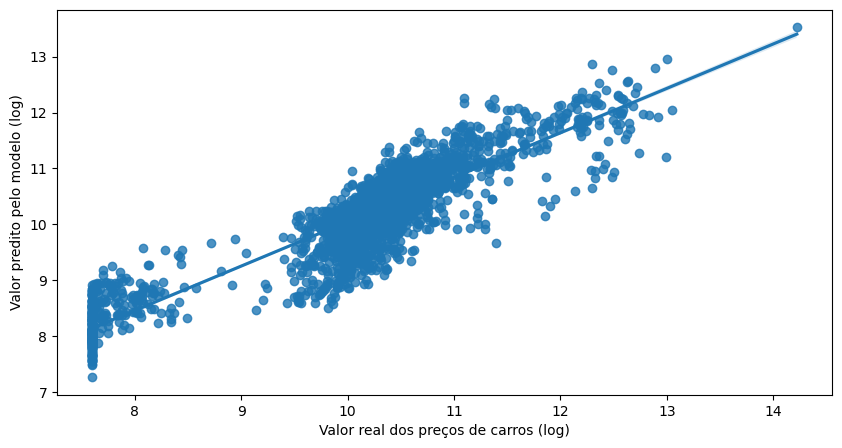

In [81]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred_test_ridge)
plt.xlabel('Valor real dos preços de carros (log)')
plt.ylabel('Valor predito pelo modelo (log)')

**Interpretação:** O modelo performou melhor no conjunto de teste.

Por um motivo randômico, talvez, o conjunto de teste tenha ficado com dados melhores

e mais uniformes.

**15.11 Validação cruzada**

**Vamos simular diferentes divisões dos conjuntos de treino e teste**

É como uma simulação interna do modelo apenas com os conjuntos de treinamento

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [83]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(ridge_reg, X_train_final, y_train, scoring='r2', cv=folds)
scores   

array([0.79985762, 0.8132809 , 0.79542518, 0.8278691 , 0.80426768])

**15.12 Equação do modelo usando Regressão Ridge**

In [84]:
intercepto = ridge_reg.intercept_

coeficientes = ridge_reg.coef_

equacao = pd.DataFrame({
    'Variável': X_train_final.columns,
    'Coeficiente (Beta)': coeficientes
})

equacao

,Variável,Coeficiente (Beta)
0,CV,0.279338
1,Cilindros,0.212892
2,Tamaño,-0.068662
3,Consumo Carretera,-0.043279
4,Consumo Ciudad,0.060061
5,Popularidad,-0.042965
6,Idade del coche,-0.670410
7,Combustible_flex,-0.155716
8,Combustible_premium,0.124632
9,Combustible_regular unleaded,-0.188509


**16.1 Regressão regularizada Lasso**

Trata-se de uma técnica de regressão que seleciona variáveis

O modelo remove variáveis que são consideradas menos relevantes

**Qual será o valor adequado dessa penalização?**

**16.2 Vamos gerar 100 valores para testar qual o valor mais adequado**

In [85]:
# Vamos gerar sem valores de 0.0001 a 10
alphas = np.logspace(-4, 1, 100)

**16.3 Vamos escolher o melhor valor por meio de uma validação cruzada**

In [86]:
from sklearn.linear_model import LassoCV

In [87]:
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state = 42)
lasso_cv.fit(X_train_final, y_train)

LassoCV(alphas=array([1.00000000e-04, 1.12332403e-04, 1.26185688e-04, 1.41747416e-04,
       1.59228279e-04, 1.78864953e-04, 2.00923300e-04, 2.25701972e-04,
       2.53536449e-04, 2.84803587e-04, 3.19926714e-04, 3.59381366e-04,
       4.03701726e-04, 4.53487851e-04, 5.09413801e-04, 5.72236766e-04,
       6.42807312e-04, 7.22080902e-04, 8.11130831e-04, 9.11162756e-04,
       1.02353102e-03, 1.14975700e-0...
       6.89261210e-01, 7.74263683e-01, 8.69749003e-01, 9.77009957e-01,
       1.09749877e+00, 1.23284674e+00, 1.38488637e+00, 1.55567614e+00,
       1.74752840e+00, 1.96304065e+00, 2.20513074e+00, 2.47707636e+00,
       2.78255940e+00, 3.12571585e+00, 3.51119173e+00, 3.94420606e+00,
       4.43062146e+00, 4.97702356e+00, 5.59081018e+00, 6.28029144e+00,
       7.05480231e+00, 7.92482898e+00, 8.90215085e+00, 1.00000000e+01]),
        cv=5, random_state=42)

**16.4 Imprimir o melhor valor de alpha**

O melhor valor de alpha será aquele que resulta em menor valor de 

MSE (Erro Quadrado Médio).


O MSE é a média do quadrado dos desvios.

In [88]:
otimo_alpha = lasso_cv.alpha_
print(f"Valor ótimo de alpha: {otimo_alpha}")

Valor ótimo de alpha: 0.001291549665014884


**16.5 Treinar um modelo coom o melhor valor de alpha**

In [90]:
from sklearn.linear_model import Lasso

In [91]:
lasso_reg = Lasso(alpha=0.00129)
lasso_reg.fit(X_train_final, y_train)

Lasso(alpha=0.00129)

**16.6 Predizer valores de y**

In [92]:
y_pred_train_lasso = lasso_reg.predict(X_train_final)
y_pred_test_lasso = lasso_reg.predict(X_test_final)

**16.7 Predizer R2 do conjunto de treinamento e do conjunto de teste**

In [93]:
# R2 para o conjunto de treinamento
r2_lasso_train = lasso_reg.score(X_train_final, y_train)

# R2 para o conjunto de teste
r2_lasso_test = lasso_reg.score(X_test_final, y_test)

print(f"Coeficiente de determinação para o conjunto de treinamento: {r2_lasso_train}")
print(f"Coeficiente de determinação para o conjunto de teste: {r2_lasso_test}")

Coeficiente de determinação para o conjunto de treinamento: 0.814535540158748
Coeficiente de determinação para o conjunto de teste: 0.8230239424284738


**16.8 Obter o número de variáveis final**

Lembre-se de que o modelo de regularização Lasso zera os coeficientes de algumas variáveis.

In [95]:
p = np.sum(lasso_reg.coef_ != 0)

print(f"Número de variáveis selecionadas pelo Lasso: {variaveis_selecionadas}")

Número de variáveis selecionadas pelo Lasso: 21


**16.9 Calcular o R2 ajsutado**

In [97]:
# R2 ajustado do conjunto de treinamento
lasso_r2_ajustado_train = 1-(1-r2_lasso_train)*(n_train-1)/(n_train-p-1)

# R2 ajustado do conjunto de teste
lasso_r2_ajustado_test = 1-(1-r2_lasso_test)*(n_test-1)/(n_test-p-1)

print(f"Coeficiente de determinação ajustado para o conjunto de treinamento: {lasso_r2_ajustado_train}")
print(f"Coeficiente de determinação ajustado para o conjunto de teste: {lasso_r2_ajustado_test}")

Coeficiente de determinação ajustado para o conjunto de treinamento: 0.8141252205573293
Coeficiente de determinação ajustado para o conjunto de teste: 0.8214471510797245


**16.10 Gráfico do modelo**

Text(0, 0.5, 'Valor predito pelo modelo (log)')

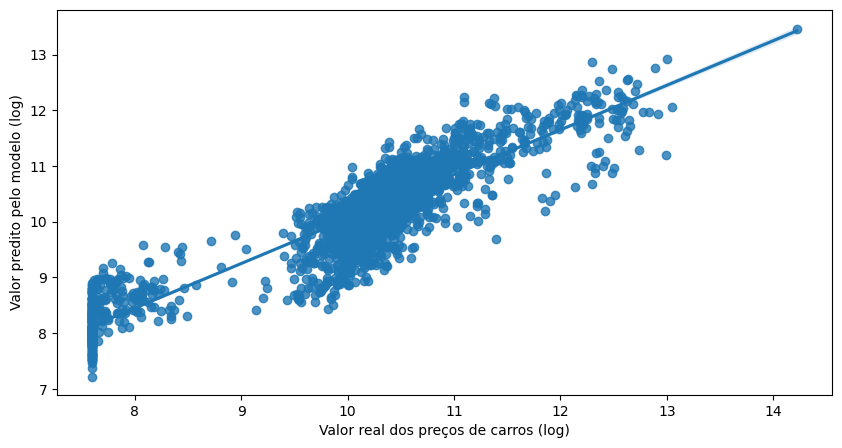

In [98]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred_test_lasso)
plt.xlabel('Valor real dos preços de carros (log)')
plt.ylabel('Valor predito pelo modelo (log)')

**16.11 Validação cruzada**

In [167]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lasso_reg, X_train_final, y_train, scoring='r2', cv=folds)
scores   

array([0.79625969, 0.81031589, 0.80039926, 0.8249475 , 0.80094142])

**16.12 Equação do modelo usando Regressão Lasso**

In [168]:
intercepto = lasso_reg.intercept_

coeficientes = lasso_reg.coef_

equacao = pd.DataFrame({
    'Variável': X_train_final.columns,
    'Coeficiente (Beta)': coeficientes
})

equacao

,Variável,Coeficiente (Beta)
0,CV,0.295762
1,Cilindros,0.205014
2,Tamaño,-0.068836
3,Consumo Carretera,-0.017333
4,Consumo Ciudad,0.045209
5,Popularidad,-0.040595
6,Idade del coche,-0.670326
7,Combustible_flex,-0.061546
8,Combustible_premium,0.195324
9,Combustible_regular unleaded,-0.108417


**17.1 Regressão linear comum**

**17.2 Antes de tudo, vou remover de X_train e X_test variáveis com valores altos de VIF**

**A intenção é criar um modelo mais simples e mais interpretável**

Vamos criar uma lista com variáveis a serem removidas

In [100]:
variaveis_vif_alto = ['Consumo Carretera', 'Consumo Ciudad', 'Combustible_premium', 'Combustible_regular unleaded', 'Combustible_flex', 
                     'Transmisión_AUTOMATIC', 'Transmisión_DIRECT_DRIVE', 'Transmisión_MANUAL', 'Estilo_SUV', 'Estilo_Sedan',
                     'Estilo_Coupe', 'Estilo_Hatchback', 'Estilo_Pickup', 'Estilo_Van', 'Estilo_Wagon']

In [101]:
X_train_final.columns

Index(['CV', 'Cilindros', 'Tamaño', 'Consumo Carretera', 'Consumo Ciudad',
       'Popularidad', 'Idade del coche', 'Combustible_flex',
       'Combustible_premium', 'Combustible_regular unleaded',
       'Transmisión_AUTOMATIC', 'Transmisión_DIRECT_DRIVE',
       'Transmisión_MANUAL', 'Tracción_four wheel drive',
       'Tracción_front wheel drive', 'Tracción_rear wheel drive',
       'Puertas_Dos puertas', 'Puertas_Tres puertas', 'Estilo_Coupe',
       'Estilo_Hatchback', 'Estilo_Pickup', 'Estilo_SUV', 'Estilo_Sedan',
       'Estilo_Van', 'Estilo_Wagon'],
      dtype='object')

In [102]:
X_train_limpo = X_train_final.drop(columns=variaveis_vif_alto)
X_test_limpo = X_test_final.drop(columns=variaveis_vif_alto)

In [105]:
X_train_limpo.head()

,CV,Cilindros,Tamaño,Popularidad,Idade del coche,Tracción_four wheel drive,Tracción_front wheel drive,Tracción_rear wheel drive,Puertas_Dos puertas,Puertas_Tres puertas
11240,-1.073586,-0.912535,-1.066692,-0.082459,-0.740193,0.0,1.0,0.0,0.0,1.0
4027,-0.447963,-0.912535,-1.066692,-0.473876,-0.474950,0.0,1.0,0.0,1.0,0.0
6167,-0.539967,0.223287,0.222171,-0.697938,1.381749,1.0,0.0,0.0,0.0,0.0
3861,-0.696373,-0.912535,-1.066692,-0.082459,-0.607572,0.0,1.0,0.0,0.0,0.0
5897,-1.027585,-0.912535,-1.066692,-1.004986,-0.740193,0.0,1.0,0.0,0.0,0.0


**17.3 Executar um modelo de regressão linear**

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lm = LinearRegression()
lm.fit(X_train_limpo, y_train)

LinearRegression()

**17.4 Predizer valores de y**

In [108]:
y_pred_train = lm.predict(X_train_limpo)
y_pred_test = lm.predict(X_test_limpo)

**17.5 Coeficientes de determinação do modelo**

In [109]:
# R2 para o conjunto de treinamento
r2_train = lm.score(X_train_limpo, y_train)

# R2 para o conjunto de teste
r2_test = lm.score(X_test_limpo, y_test)

print(f"Coeficiente de determinação para o conjunto de treinamento: {r2_train}")
print(f"Coeficiente de determinação para o conjunto de teste: {r2_test}")

Coeficiente de determinação para o conjunto de treinamento: 0.7896360655649207
Coeficiente de determinação para o conjunto de teste: 0.8042939753366442


**17.6 Calcular R2 ajustado**

In [110]:
p = 10

# R2 ajustado do conjunto de treinamento
r2_ajustado_train = 1-(1-r2_train)*(n_train-1)/(n_train-p-1)

# R2 ajustado do conjunto de teste
r2_ajustado_test = 1-(1-r2_test)*(n_test-1)/(n_test-p-1)

print(f"Coeficiente de determinação ajustado para o conjunto de treinamento: {r2_ajustado_train}")
print(f"Coeficiente de determinação ajustado para o conjunto de teste: {r2_ajustado_test}")

Coeficiente de determinação ajustado para o conjunto de treinamento: 0.7894146997494571
Coeficiente de determinação ajustado para o conjunto de teste: 0.8034675140838428


**17.7 Validação cruzada**

In [188]:
cv_lm = cross_val_score(estimator = lm, X = X_train_limpo, y = y_train, cv = 5)
cv_lm

array([0.81312742, 0.78720457, 0.77930409, 0.77914037, 0.78458067])

**17.8 Equação do modelo**

In [111]:
intercepto = lm.intercept_

coeficientes = lm.coef_

equacao = pd.DataFrame({
    'Variável': X_train_limpo.columns,
    'Coeficiente (Beta)': coeficientes
})

equacao

,Variável,Coeficiente (Beta)
0,CV,0.383098
1,Cilindros,0.180068
2,Tamaño,-0.073282
3,Popularidad,-0.061771
4,Idade del coche,-0.706997
5,Tracción_four wheel drive,-0.193299
6,Tracción_front wheel drive,-0.113527
7,Tracción_rear wheel drive,-0.133063
8,Puertas_Dos puertas,0.006094
9,Puertas_Tres puertas,-0.168939


**Interpretação:**

Remover variáveis correlacionadas não melhorou performance do modelo.


Multicolinearidade mais atrapalhou a interpretação do modelo do que a peformance.



Text(0, 0.5, 'Valor predito pelo modelo (log)')

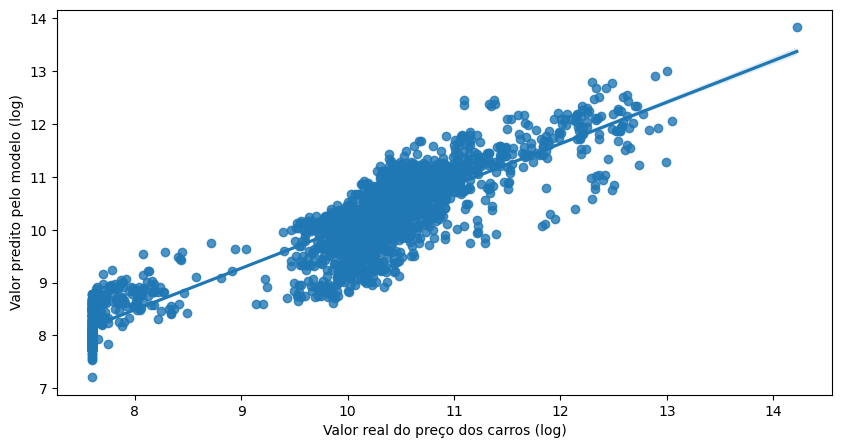

In [113]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred_test)
plt.xlabel('Valor real do preço dos carros (log)')
plt.ylabel('Valor predito pelo modelo (log)')

**Interpretação**

Valores ajustam-se relativamente à uma reta.


Há, pelo menos, três grupos de carros usados.


Possibilidade de construir três modelos?

Usar aprendizado não supervisionado?